In [239]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀(예측)
from sklearn.model_selection import train_test_split # 데이터 나눔
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [240]:
# numpy 라이브러리 사용
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])


In [241]:
# # pandas
# perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
#      21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
#      22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
#      27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
#      36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
#      40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

# perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
#      110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
#      130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
#      197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
#      514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
#      820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
#      1000.0, 1000.0]

# df = pd.DataFrame([perch_length,perch_weight])
# df = df.T
# df.head()

Text(0, 0.5, '무게')

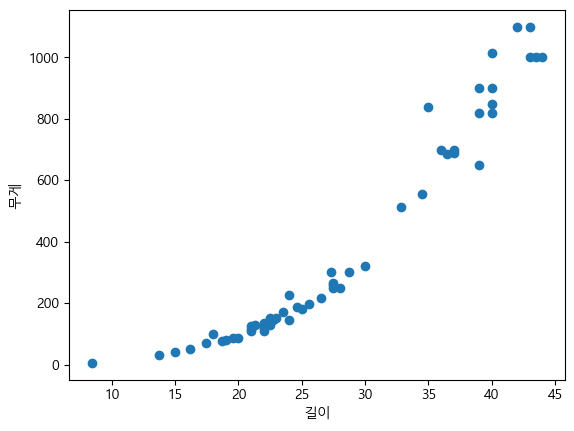

In [242]:
# 산점도 출력
# x축 길이, y축 무게
# plt.scatter(df[0],df[1])
plt.scatter(perch_length,perch_weight)
plt.xlabel('길이')
plt.ylabel('무게')


머신러닝 구현
1. 데이터 전처리 - NaN, 0, 단위, 훈련세트, 테스트세트 분리
2. 데이터 학습
3. 데이터 예측 - 평균 절대값 오차
4. 예측값 구하기

In [243]:
# 머신러닝 구현
# 1. 데이터 전처리 - NaN, 0, 단위, 훈련세트, 테스트세트 분리
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight)
train_input


array([22.5, 43. , 25. , 19. , 23. , 21. , 42. , 40. , 18.7, 39. , 43.5,
       39. , 37. , 22. , 40. , 22. , 20. , 30. , 13.7, 21.3, 21. , 36. ,
       28. , 16.2, 27.3, 18. ,  8.4, 17.4, 40. , 27.5, 36.5, 25.6, 22. ,
       27.5, 19.6, 32.8, 35. , 24. , 39. , 15. , 44. , 43. ])

In [244]:
test_input
test_target

array([300., 130., 150., 218., 556., 145., 690., 250., 120., 145., 125.,
       188., 820., 170.])

In [245]:
# 알고리즘 구현을 위해 2차원 행렬로 변경 reshape
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1) # -1 : 남은 배열의 길이와 남은 차원으로부터 추정하여 알아서 지정

In [246]:
# 총 개수 : 56 // train_test_split 으로 분리 할 때 8:2 비율로 나눔
train_input.shape #42
test_input.shape #14

(14, 1)

In [247]:
# 데이터 학습
knr = KNeighborsRegressor() 
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [248]:
# 데이터 예측
# 예측의 오차범위 - 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
print('예측값 :',predict)  # 길이에 대한 무게 예측

예측값 : [279.  125.  129.  240.4 687.8 176.4 711.  254.4 125.  129.  122.  176.4
 847.  164. ]


In [249]:
# 예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print('오차 범위 :',test_mean)

오차 범위 : 23.32857142857143


In [250]:
# 예측률 측정 - test_input 데이터 검증
score = knr.score(test_input,test_target)
print('예측률 :',score)

예측률 : 0.9688050876175718


In [251]:
# 실제 train 데이터의 예측률 확인
score2 = knr.score(train_input,train_target)
print(score2) 

0.9771651327341004


In [257]:
# 과소적합 -> 이웃의 개수를 축소시켜야 함 (n_neighbors 기본 값 5)
# 과대적합 -> 이웃의 개수를 늘려야함
knr.n_neighbors = 3
# 데이터 훈련 다시
knr.fit(train_input,train_target)
# train 데이터 예측
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))


0.9871935289837707
0.9526355628844616


In [258]:
# np.arange(5,45).reshape(-1,1)
arr = [[i] for i in range(5,45+1)] # x축의 좌표
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

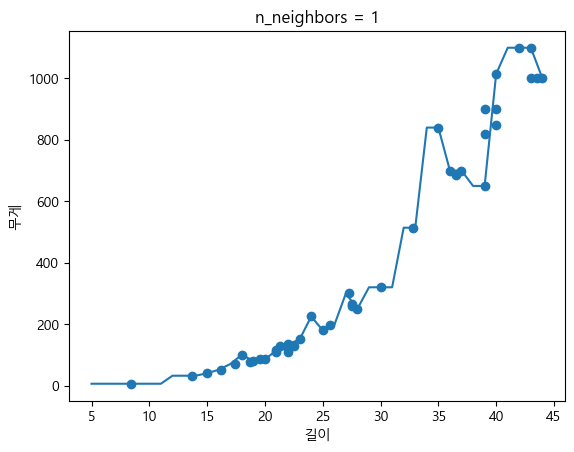

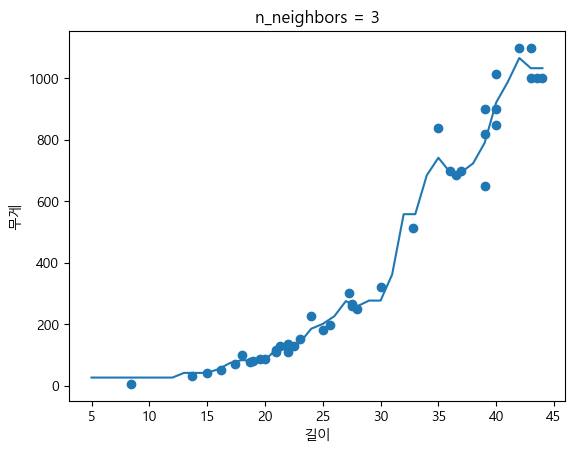

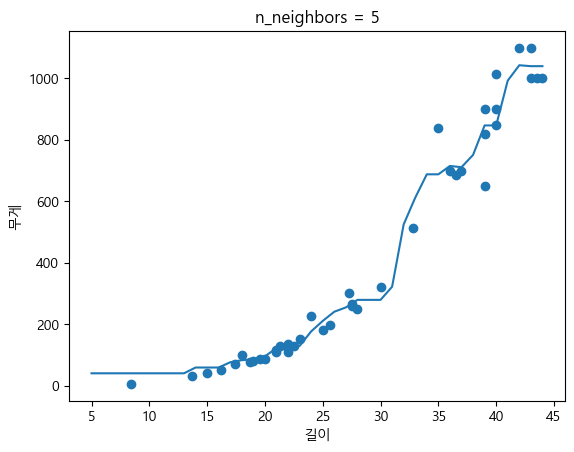

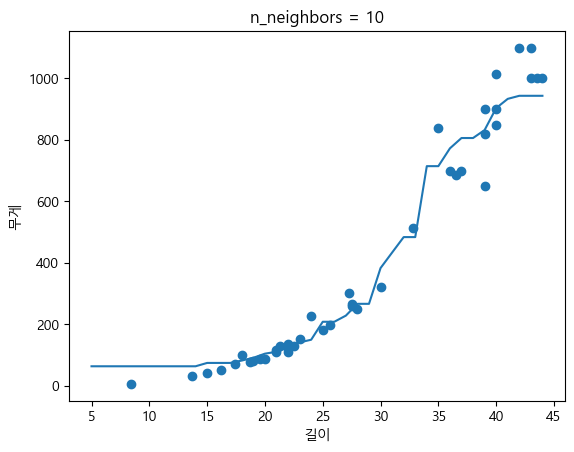

In [264]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,3,5,10]: # n_neighbors = 1,5,10일 때 예측률을 그래프로 표시
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    # 배열로 만든 길이를 이용하여 예측 무게 산출
    predict = knr.predict(x)

    # 훈련세트의 값을 먼저 출력
    plt.scatter(train_input,train_target)
    plt.plot(x,predict)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()